### 1. Env
conda create -n crenv python=3.9.0
### 2. references
#### 2.1 https://www.cnblogs.com/lovy-ivy/p/16551416.html
#### 2.2 https://www.cnblogs.com/yume-zbh/p/16548612.html
#### 2.3 [如何统计词频](https://blog.csdn.net/m0_51566872/article/details/121199795)


In [57]:
import requests
import json
from bs4 import BeautifulSoup

In [59]:
urls = [f'https://www.cnblogs.com/cmt/category/218599.html?page={page}' for page in range(1, 32)]

headers = {
	"content-type": "application/json",
	"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.54 Safari/537.36 Edg/95.0.1020.30"
}

# 这函数用来发送请求,注意实际传递的url值
def craw(url):

	payload = {
		"CategoryType": "SiteHome",
		"ParentCategoryId": 0,
		"CategoryId": 808,
		"TotalPostCount": 4000,

	}
    # 发送的是get请求
	r = requests.get(url, data=json.dumps(payload), headers=headers)
	return r.text


def parse(html):
    soup = BeautifulSoup(html, "html.parser")
    links = soup.find_all("a", class_="entrylistItemTitle")
    times=soup.find_all("a",title="permalink")
    temp=[]
    for i in range(0,len(links)):
        url=links[i]["href"]
        text= links[i].get_text().replace("\n","").strip()
        ts=times[i].get_text()
        temp.append((url,text,ts))
    # return [(link["href"], link.get_text()) for link in links]
    return temp
    



In [60]:
weekly_hot_list=[]
for url in urls:
    for res in parse(craw(url)):
        weekly_hot_list.append(res)
print(weekly_hot_list[0])
print(len(weekly_hot_list))

('https://www.cnblogs.com/cmt/p/16729749.html', '上周热点回顾（9.19-9.25）', '2022-09-26 09:15')


In [62]:
import pandas as pd
df=pd.DataFrame(weekly_hot_list,columns=['url','title','ts'])
df.head()

,url,title,ts
0,https://www.cnblogs.com/cmt/p/16729749.html,上周热点回顾（9.19-9.25）,2022-09-26 09:15
1,https://www.cnblogs.com/cmt/p/16706860.html,上周热点回顾（9.12-9.18）,2022-09-19 10:31
2,https://www.cnblogs.com/cmt/p/16685636.html,上周热点回顾（9.5-9.11）,2022-09-12 10:32
3,https://www.cnblogs.com/cmt/p/16657056.html,上周热点回顾（8.29-9.4）,2022-09-05 09:56
4,https://www.cnblogs.com/cmt/p/16634970.html,上周热点回顾（8.22-8.28）,2022-08-29 10:12


In [64]:
df.to_csv("weekly_hot_list.csv",index=False)

In [ ]:
# temp=craw('https://www.cnblogs.com/cmt/p/16729749.html')
# soup = BeautifulSoup(temp, "html.parser")
# links = soup.find_all("a", rel="noopener")
# titles=[link.get_text() for link in links]
# print(titles)
    

In [ ]:
# temp=craw('https://www.cnblogs.com/cmt/p/16729749.html')
# soup = BeautifulSoup(temp, "html.parser")
# links = soup.find_all("p")
# titles=[link.get_text() for link in links]
# print(titles)

In [66]:
res=df.copy()
res['热点随笔']=""
res['热点新闻']=""
res['作者']=""
#选择2017年之后的热点进行分析
res=res[res['ts']>'2016-12-31 00:01']
def craw_and_parse_weekly_hot(df):

    for i in range(0,len(df)):
        html=craw(df.iloc[i]['url'])
        soup = BeautifulSoup(html, "html.parser")
        hots = soup.find_all("a", rel="noopener")
        hots=[hot.get_text() for hot in hots]
    #通过奇偶数判断随笔和作者
        df.iloc[i]['热点随笔']=hots[0:24:2]
        df.iloc[i]['作者']=hots[1:24:2]
    #热点新闻 和 热点随笔的url是不同的，新闻的包含news，随笔的包含archive
    #但这里仅作普通区分
        df.iloc[i]['热点新闻']=hots[24:36]
    return df

res = craw_and_parse_weekly_hot(res)
res.head()


,url,title,ts,热点随笔,热点新闻,作者
0,https://www.cnblogs.com/cmt/p/16729749.html,上周热点回顾（9.19-9.25）,2022-09-26 09:15,"[前端必读2.0：如何在React 中使用SpreadJS导入和导出 Excel 文件, 前...","[央媒不点名批评顺丰：于情不顾、于理不合、于法不容, 被「羊了个羊」逼疯后，鹅厂程序员怒而自...","[葡萄城技术团队, 葡萄城技术团队, 葡萄城技术团队, 张飞洪[厦门], 一事冇诚, Fre..."
1,https://www.cnblogs.com/cmt/p/16706860.html,上周热点回顾（9.12-9.18）,2022-09-19 10:31,"[如何写成高性能的代码（一）：巧用Canvas绘制电子表格, 里程碑！用自己的编程语言实现了...","[微信动不动就几十GB UP主深扒：同一个文件居然存10份, 坚持23年后，他关闭了自行托管...","[葡萄城技术团队, crossoverJie, aardio, 张善友, C#开源即时通讯G..."
2,https://www.cnblogs.com/cmt/p/16685636.html,上周热点回顾（9.5-9.11）,2022-09-12 10:32,"[没有二十年功力，写不出Thread.sleep(0)这一行“看似无用”的代码！, 内卷时代...","[被赶下班车的外包人, 微软全力拥抱 Java ！, 支付宝和张三的十年战争, 华为Mate...","[why技术, 葡萄城技术团队, crossoverJie, 追逐时光者, 彭旭锐, aar..."
3,https://www.cnblogs.com/cmt/p/16657056.html,上周热点回顾（8.29-9.4）,2022-09-05 09:56,"[.NET 7 性能改进 -- 至今为止最快的.NET平台, 一次服务器被入侵的处理过程分享...","[中国空间站种出了水稻, 微软有史以来最重的软件：超过 18 公斤, 去掉jQuery后，我...","[张善友, 自由早晚乱余生, why技术, 葡萄城技术团队, FreeSql, 架构悟道, ..."
4,https://www.cnblogs.com/cmt/p/16634970.html,上周热点回顾（8.22-8.28）,2022-08-29 10:12,"[拒绝加班:巧用前端电子表格中构建公式树, 被一个问题卡了近两天，下班后我哭了......,...","[上网套餐太辣鸡，老哥花98万自建光纤网络，承包村里70户居民上网, 任正非“定调”华为未来...","[葡萄城技术团队, 久曲健, 艾小仙, FreeSql, SpringLeee, 痴者工良,..."


In [68]:
res.to_csv("res.csv",index=False)

In [ ]:
# #check if any case the length for last 2 columns all not equal
# for index,row in df.iterrows():
#     if len(row['热点随笔']) !=len(row['热点新闻']):
#         print("NOT equal!")
# #result is all equal

In [ ]:
# #把随笔list组合成一段text，用句号。连接
# temp=res.iloc[1][3]
# print(temp)
# temp=str.join("。",temp)
# print(temp)

In [ ]:
# temp=res.iloc[1][4]
# print(temp)
# temp=str.join("。",temp)
# print(temp)

In [ ]:
# temp=res.iloc[1][5]
# print(temp)
# # 作者不需要整理成text进行分词

## So far, the crawlering work has been done.

In [84]:
import jieba
import wordcloud
import pandas as pd
# 使用自定义词典
jieba.load_userdict('userdict.txt')

In [97]:
# 需要添加stopwords
def stopwordslist():
    stopwords = [line.strip() for line in open('哈工大停用词表.txt',encoding='UTF-8').readlines()]
    return stopwords
sw=stopwordslist()
print(sw[:5])

df=pd.read_csv("res.csv")
# 选取22年之后的数据
df22=df[df['ts']>'2022-01-01'].copy()
# df22['cut_notes']=''
# df22['cut_news']=''
df22.head()

['———', '》），', '）÷（１－', '”，', '）、']


,url,title,ts,热点随笔,热点新闻,作者
0,https://www.cnblogs.com/cmt/p/16729749.html,上周热点回顾（9.19-9.25）,2022-09-26 09:15,"['前端必读2.0：如何在React 中使用SpreadJS导入和导出 Excel 文件',...","['央媒不点名批评顺丰：于情不顾、于理不合、于法不容', '被「羊了个羊」逼疯后，鹅厂程序员...","['葡萄城技术团队', '葡萄城技术团队', '葡萄城技术团队', '张飞洪[厦门]', '..."
1,https://www.cnblogs.com/cmt/p/16706860.html,上周热点回顾（9.12-9.18）,2022-09-19 10:31,"['如何写成高性能的代码（一）：巧用Canvas绘制电子表格', '里程碑！用自己的编程语言...","['微信动不动就几十GB UP主深扒：同一个文件居然存10份', '坚持23年后，他关闭了自...","['葡萄城技术团队', 'crossoverJie', 'aardio', '张善友', '..."
2,https://www.cnblogs.com/cmt/p/16685636.html,上周热点回顾（9.5-9.11）,2022-09-12 10:32,"['没有二十年功力，写不出Thread.sleep(0)这一行“看似无用”的代码！', '内...","['被赶下班车的外包人', '微软全力拥抱 Java ！', '支付宝和张三的十年战争', ...","['why技术', '葡萄城技术团队', 'crossoverJie', '追逐时光者', ..."
3,https://www.cnblogs.com/cmt/p/16657056.html,上周热点回顾（8.29-9.4）,2022-09-05 09:56,"['.NET 7 性能改进 -- 至今为止最快的.NET平台', '一次服务器被入侵的处理过...","['中国空间站种出了水稻', '微软有史以来最重的软件：超过 18 公斤', '去掉jQue...","['张善友', '自由早晚乱余生', 'why技术', '葡萄城技术团队', 'FreeSq..."
4,https://www.cnblogs.com/cmt/p/16634970.html,上周热点回顾（8.22-8.28）,2022-08-29 10:12,"['拒绝加班:巧用前端电子表格中构建公式树', '被一个问题卡了近两天，下班后我哭了.......","['上网套餐太辣鸡，老哥花98万自建光纤网络，承包村里70户居民上网', '任正非“定调”华...","['葡萄城技术团队', '久曲健', '艾小仙', 'FreeSql', 'SpringLe..."


In [127]:
# 把每周的热点随笔和新闻进行分词，分词后保存到新建的两列
# 使用stopwords去除掉标点符号和无意义词
ds=[]
for col_index in range(3,5):
    res_full=[]
    for i in range(0,len(df22)):
        temp=df22.iloc[i][col_index].split(',')
        for t in temp:
            cut=jieba.lcut(t)
            # 去掉停用词
            cut_res=[i for i in cut if not i in sw]
            # 去掉长度为1的词，比如“个”，“人”
            cut_res=[i for i in cut if not len(i)==1]
            res_full.extend(cut_res)
    ds.append(pd.Series(res_full).value_counts())
    print('------------')





------------
------------


In [128]:
#统计作者和出现频率
author_list=[]
for i in df22['作者']:
    author_list.extend(i[1:len(i)-1].split(','))
ds.append(pd.Series(author_list).value_counts())


In [129]:
for d in ds:
    print(list(d[:20].to_dict().keys()))
    print(list(d[:20].to_dict().values()))


['.NET', '如何', '实现', '一个', '技术', 'Core', '使用', 'C#', '开源', '基于', '开发', '代码', 'ASP.NET', '发布', '性能', '框架', '前端', '项目', '系统', '问题']
[84, 45, 45, 37, 35, 34, 33, 29, 25, 21, 21, 20, 20, 19, 19, 18, 18, 17, 16, 16]
['中国', '微软', '大厂', '华为', '程序员', '宇宙', '发布', '开源', '一个', '代码', '世界', '互联网', 'GitHub', 'AI', '芯片', '发现', '开发者', '公司', '员工', '为什么']
[26, 23, 19, 19, 18, 17, 16, 16, 14, 14, 14, 13, 13, 13, 13, 13, 12, 12, 11, 11]
[" '叶小钗'", "'葡萄城技术团队'", " 'ChokCoco'", " '削微寒'", " 'Artech'", " '张善友'", " 'InCerry'", " '葡萄城技术团队'", " '一线码农'", " 'FreeSql'", " 'why技术'", " '张飞洪[厦门]'", " 'yi念之间'", " '博客园团队'", " 'Dragonir'", " '陈珙'", " 'lindexi'", " 'SpringLeee'", " '沉默王二'", " '包子wxl'"]
[28, 25, 21, 15, 14, 14, 13, 13, 11, 9, 9, 7, 7, 7, 6, 5, 5, 5, 5, 4]


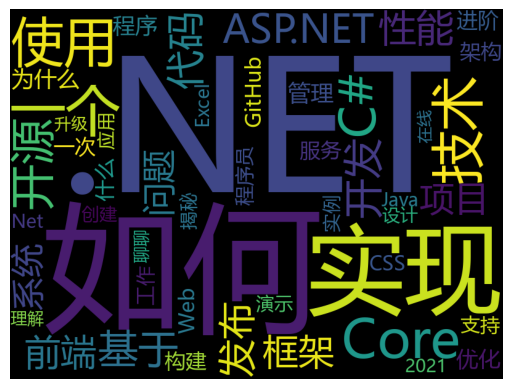

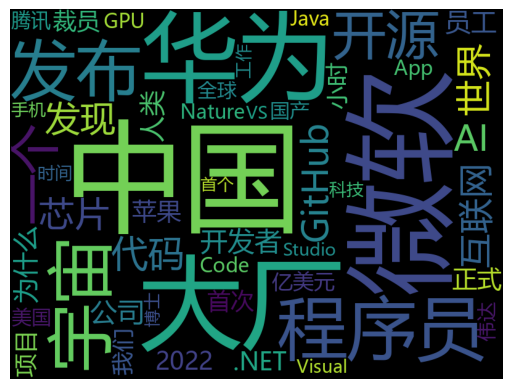

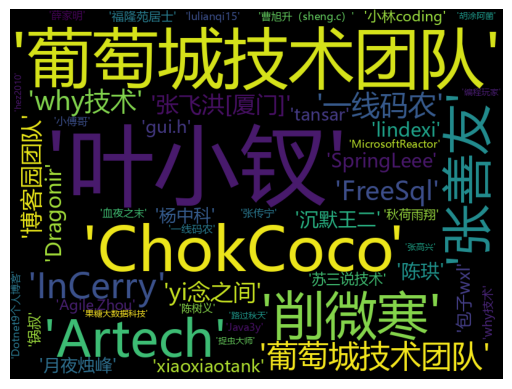

In [130]:
#生成
w=wordcloud.WordCloud(font_path='msyh.ttc',width=800,height=600,max_words=50)
for d in ds:
    #print(d[:20])
    temp=d.to_dict()
    w.generate_from_frequencies(temp)
    import matplotlib.pyplot as plt
    plt.imshow(w)
    plt.axis('off')
    plt.show()